# Práctica 2: Limpieza y análisis de datos
## Autores
Hemos realizado esta práctica:
* Ignacio Such Ballester
* Andrés Isidro Fonts Santana

## 1. Descripción del _dataset_
### 1.1 Contexto
Se pretende sacar al mercado un nuevo juego de mesa lo más existoso posible y convertirlo en un bestseller.

Para ello, hemos escogido el _dataset_ [Board Game Data](https://www.kaggle.com/datasets/mrpantherson/board-game-data?select=bgg_db_2018_01.csv), disponible en la plataforma Kaggle.

Este conjunto de datos se ha extraído mediante la API del portal [Board Games Geek](https://boardgamegeek.com/). El _dataset_ se generó en enero de 2018 y contiene datos sobre los primeros 5000 juegos de mesa del _ranking_ de Board Games Geek. 

A través de este set de datos, podemos realizar un análisis profundo del mismo, obteniendo correlaciones, clasificaciones en incluso predicciones para averigurar cómo diseñar nuestro juego de mesa.

Además, se podrá proceder a crear modelos de regresión que permitan predecir si un juego será un bestseller o no en función de sus características y contrastes de hipótesis que ayuden a identificar propiedades interesantes en las muestras.

### 1.2 Descripción de los atributos 
Cada uno de los 5000 registros con que cuenta al _dataset_ viene determinado por 20 attributos:

| Nombre      | Tipo    | Descripción                         | Ejemplo
|:------------|:--------|:------------------------------------|:-------------------------------------------------------------
| rank        | int     | Posición en el _ranking_ de BGG     | 21
| bgg_url     | string  | Link a url de la reseña en BGG      | https://boardgamegeek.com/boardgame/167791/terraforming-mars
| game_id     | string  | Identificador del juego en BGG      | 25613
| names       | string  | Nombre del juego                    | Terraforming Mars
| min_players | int     | Número mínimo de jugadores          | 2
| max_players | int     | Número máximo de jugadores          | 4
| avg_time    | int     | Tiempo medio de partida (minutos)   | 60
| min_time    | int     | Tiempo mínimo de partida (minutos)  | 30
| max_time    | int     | Tiempo máx de partida (minutos)     | 120
| year        | int     | Año de publicación                  | 2014
| avg_rating  | float   | Puntuación media del juego según usuarios de BGG (sobre 10)| 8.0096
| geek_rating | float   | Puntuació de BGG, obtenida a través de un algoritmo de ponderación bayesiana (algoritmo no público) |8.49837
| num_votes   | int     | Número de usuarios que han dado puntuación al juego | 1779
| image_url   | string  | Enlace a la imagen del juego  | https://cf.geekdo-images.com/images/pic361592.jpg
| age         | int     | Edad mínimia recomendada | 12
| mechanic    | string  | Tipo de Mecánicas del juego, separadas por comas | Area Enclosure, Card Drafting, Hand Management, Variable Player Powers, Worker Placement
| owned       | int     | Número de usuarios de BGG que han notificado que poseen el juego | 18217
| category    | string  | Categorías a las que pertenece el juego, separadas por comas | Ancient, Card Game, City Building, Civilization
| designer    | string  | Diseñador/a del juego. Si más de uno, separados por comas | Jamey Stegmaier
| weight      | float   | Grado de complejidad del juego (escaña de 1 a 5) | 2.394


## 2. Carga de datos y selección
Utilizaremos la librería `pandas` para trabajar con los datos así como `plotly` para realizar gráficos.

In [1]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np

# Importamos plotly y también lo asignamos como backend de pandas plot.
import plotly.express as px
pd.options.plotting.backend = "plotly"

# Llamamos "bgg" al dataframe creado a partir del dataset
bgg = pd.read_csv('../csv/bgg_db_2018_01.csv',sep=',',encoding='latin-1')

Veamos qué aspecto tienen los datos, utilizando `.head()`.

In [2]:
bgg.head()

rank                                            bgg_url  game_id  \
0     1  https://boardgamegeek.com/boardgame/174430/glo...   174430   
1     2  https://boardgamegeek.com/boardgame/161936/pan...   161936   
2     3  https://boardgamegeek.com/boardgame/182028/thr...   182028   
3     4  https://boardgamegeek.com/boardgame/12333/twil...    12333   
4     5  https://boardgamegeek.com/boardgame/167791/ter...   167791   

                                           names  min_players  max_players  \
0                                     Gloomhaven            1            4   
1                      Pandemic Legacy: Season 1            2            4   
2  Through the Ages: A New Story of Civilization            2            4   
3                              Twilight Struggle            2            2   
4                              Terraforming Mars            1            5   

   avg_time  min_time  max_time  year  avg_rating  geek_rating  num_votes  \
0       150        90       150  2017     9.01310      8.52234       9841   
1        60        60        60  2015     8.66575      8.49837      23489   
2       240       180       240  2015     8.65702      8.32401      10679   
3       180       120       180  2005     8.35188      8.21012      29923   
4       120       120       120  2016     8.38331      8.17328      20468   

                                           image_url  age  \
0  https://cf.geekdo-images.com/images/pic2437871...   12   
1  https://cf.geekdo-images.com/images/pic2452831...   13   
2  https://cf.geekdo-images.com/images/pic2663291...   14   
3  https://cf.geekdo-images.com/images/pic361592.jpg   13   
4  https://cf.geekdo-images.com/images/pic3536616...   12   

                                            mechanic  owned  \
0  Action / Movement Programming, Co-operative Pl...  18217   
1  Action Point Allowance System, Co-operative Pl...  38105   
2  Action Point Allowance System, Auction/Bidding...  14147   
3  Area Control / Area Influence, Campaign / Batt...  41094   
4  Card Drafting, Hand Management, Tile Placement...  26145   

                                            category  \
0  Adventure, Exploration, Fantasy, Fighting, Min...   
1                             Environmental, Medical   
2                  Card Game, Civilization, Economic   
3                 Modern Warfare, Political, Wargame   
4  Economic, Environmental, Industry / Manufactur...   

                       designer  weight  
0                Isaac Childres  3.7720  
1      Rob Daviau, Matt Leacock  2.8056  
2                Vlaada Chvátil  4.3538  
3  Ananda Gupta, Jason Matthews  3.5446  
4               Jacob Fryxelius  3.2465

Constatamos que los atributos `bgg_url` y `image_url` no nos van a ninguna información relevante al estudio que queremos realizar sobre los datos. 

Eliminamos estos datos usando el método `.drop()`. 

In [3]:
# Eliminamos las columnas que no utilizaremos para el análisis
bgg.drop('bgg_url'  , inplace=True, axis=1)
bgg.drop('image_url', inplace=True, axis=1)

Por otro lado, según la documentación de BoardGameGeek, para evaluar el _ranking_ global del juego se utiliza el atributo `geek_rating`. Este atributo realiza una ponderación Bayesiana utilizando un algoritmo que BGG no publica.

Sí sabemos que en este algoritmo se compensan aquellos juegos con pocas valoraciones, pudiendo añadir hasta 100 votos _virtuales_ (ver [este enlace](https://boardgamegeek.com/wiki/page/BoardGameGeek_FAQ#toc13)).

Para nuestro estudio, partiremos de aquellos datos que tengan como mínimo 500 valoracion de usuarios.

In [4]:
# Filtrar por mínimo de votos
bgg = bgg[bgg.num_votes > 500]

## 3. Limpieza de los datos
### 3.1 Valores nulos, ceros y elementos vacíos
En primer lugar, revisamos si existens valores nulos o elementos vacíos. Utilizaremos el método `isnull()` para determinar si un dato es nulo, y posteriormente `.sum()` para contar cuantos elementos nulos entontramos en cada atributo.

In [5]:
# Muestra elementos "null" de nuestro conjunto de datos bgg
bgg.isnull().sum()

rank           0
game_id        0
names          0
min_players    0
max_players    0
avg_time       0
min_time       0
max_time       0
year           0
avg_rating     0
geek_rating    0
num_votes      0
age            0
mechanic       0
owned          0
category       0
designer       0
weight         0
dtype: int64

En el conjunto de datos `bgg` no observamos valores nulos.

Los valores nulos podrían estar representados también como valores "cero". Con `.describe()` obtendremos un resumen de nuestro _dataset_ y podremos identificar artributos con valores "cero".

In [6]:
# Muestra valores con .describe(), redondeando a dos decimales
bgg.describe().round(2)

rank    game_id  min_players  max_players  avg_time  min_time  \
count  2721.00    2721.00      2721.00      2721.00   2721.00   2721.00   
mean   1541.47   76880.33         2.07         5.21     86.48     67.53   
std    1078.85   71001.19         0.69         6.16    294.46    142.69   
min       1.00       1.00         0.00         0.00      0.00      0.00   
25%     681.00    8668.00         2.00         4.00     30.00     30.00   
50%    1366.00   45986.00         2.00         4.00     60.00     45.00   
75%    2205.00  144270.00         2.00         6.00     90.00     75.00   
max    4987.00  236191.00         8.00        99.00  12000.00   6000.00   

       max_time     year  avg_rating  geek_rating  num_votes      age  \
count   2721.00  2721.00     2721.00      2721.00    2721.00  2721.00   
mean      86.33  1996.08        6.92         6.35    3267.92    10.51   
std      294.49   161.60        0.55         0.50    5775.83     2.73   
min        0.00 -3000.00        5.77         5.64     501.00     0.00   
25%       30.00  2003.00        6.50         5.96     798.00     8.00   
50%       60.00  2009.00        6.88         6.24    1394.00    10.00   
75%       90.00  2014.00        7.31         6.65    3075.00    12.00   
max    12000.00  2017.00        9.07         8.52   74261.00    18.00   

           owned   weight  
count    2721.00  2721.00  
mean     4794.14     2.29  
std      7811.86     0.77  
min       458.00     0.00  
25%      1444.00     1.71  
50%      2365.00     2.23  
75%      4695.00     2.81  
max    106608.00     4.70

Aquí se puede ver que para algunas observaciones encontramos juegos que tienen valores "cero", como son en las variables `min_players`, `max_players`, `avg_time`, `min_time`, `max_time`, `age` y `weight`.

#### 3.1.1 Variable `min_players`
Empezemos analizando qué datos corresponden a `min_players = 0`.

In [7]:
# Mostramos aquellos registros en que la variable min_players = 0
bgg[bgg['min_players']==0]

rank  game_id                     names  min_players  max_players  \
2164  2165    18291     Unpublished Prototype            0            0   
2475  2476    23953  Outside the Scope of BGG            0            0   
2523  2524    21804    Traditional Card Games            0            0   

      avg_time  min_time  max_time  year  avg_rating  geek_rating  num_votes  \
2164         0         0         0     0     6.97370      5.96984        577   
2475         0         0         0     0     6.73655      5.90572        516   
2523         0         0         0     0     6.52588      5.89507        689   

      age mechanic  owned                category      designer  weight  
2164    0     none    881                    none  (Uncredited)  2.4000  
2475    0     none   2190                    none  (Uncredited)  1.6582  
2523    0     none   1203  Card Game, Game System  (Uncredited)  2.0169

Por el nombre del juego entendemos que estos registros corresponden a reseñas "genéricas" publicadas en el portal Board Game Geek, no se trata de juegos de mesa reales. De hecho los registros `min_players`, `max_players`, `avg_time`, `min_time`, `max_time`, `year` y `age` son todos `0`.

Decidimos retirar estos registros de nuestro conjunto de datos.

In [8]:
# Eliminamos los registros que corresponden a min_players = 0
bgg = bgg[bgg['min_players']!=0]

Volvamos a comprobar nuestros datos:

In [9]:
# Muestra valores con .describe(), redondeando a dos decimales
bgg.describe().round(2)

rank    game_id  min_players  max_players  avg_time  min_time  \
count  2718.00    2718.00      2718.00      2718.00   2718.00   2718.00   
mean   1540.53   76941.62         2.07         5.21     86.58     67.60   
std    1079.07   71016.34         0.69         6.16    294.61    142.75   
min       1.00       1.00         1.00         1.00      1.00      0.00   
25%     680.25    8581.00         2.00         4.00     30.00     30.00   
50%    1364.50   46110.00         2.00         4.00     60.00     45.00   
75%    2203.75  144311.25         2.00         6.00     90.00     75.00   
max    4987.00  236191.00         8.00        99.00  12000.00   6000.00   

       max_time     year  avg_rating  geek_rating  num_votes      age  \
count   2718.00  2718.00     2718.00      2718.00    2718.00  2718.00   
mean      86.42  1998.29        6.92         6.35    3270.87    10.53   
std      294.64   147.44        0.55         0.50    5778.33     2.70   
min        0.00 -3000.00        5.77         5.64     501.00     0.00   
25%       30.00  2003.00        6.50         5.96     799.50     8.00   
50%       60.00  2009.00        6.88         6.24    1395.50    10.00   
75%       90.00  2014.00        7.31         6.65    3076.50    12.00   
max    12000.00  2017.00        9.07         8.52   74261.00    18.00   

           owned   weight  
count    2718.00  2718.00  
mean     4797.86     2.29  
std      7815.35     0.77  
min       458.00     0.00  
25%      1444.50     1.71  
50%      2370.00     2.23  
75%      4704.00     2.81  
max    106608.00     4.70

Quedan por analizar los valores cero de los atributos `min_time`, `max_time`, `age` y `weight`.

#### 3.1.2 Variable `min_time`
Veamos qué registros presentan `min_time = 0`.

In [10]:
# Mostramos aquellos registros en que la variable min_time = 0
bgg[bgg['min_time']==0]

rank  game_id                                names  min_players  \
567    568   153016  Telestrations: 12 Player Party Pack            4   
893    894   181810             Kodama: The Tree Spirits            2   
1056  1056   175307           Adventure Time Love Letter            2   
1252  1252   198487           Smash Up: Cease and Desist            2   
3092  3093     2375                             Sequence            2   

      max_players  avg_time  min_time  max_time  year  avg_rating  \
567            12        30         0        30  2011     7.81886   
893             5        40         0        40  2016     6.93798   
1056            4        20         0        20  2015     7.29491   
1252            2        45         0        45  2016     7.62728   
3092           12        30         0        30  1982     5.93718   

      geek_rating  num_votes  age  \
567       6.76384       1289   12   
893       6.48469       2575   14   
1056      6.38417       1164   10   
1252      6.28925        669    0   
3092      5.79978       5010    7   

                                               mechanic  owned  \
567                      Line Drawing, Paper-and-Pencil   2653   
893                      Set Collection, Tile Placement   5578   
1056                Hand Management, Player Elimination   2636   
1252  Area Control / Area Influence, Hand Management...   2954   
3092    Hand Management, Partnerships, Pattern Building   9233   

                          category       designer  weight  
567                     Party Game   (Uncredited)  1.0968  
893   Abstract Strategy, Card Game   Daniel Solis  1.6290  
1056          Card Game, Deduction    Seiji Kanai  1.0286  
1252            Card Game, Fantasy  Paul Peterson  0.0000  
3092  Abstract Strategy, Card Game    Doug Reuter  1.3529

En estos registros no consta el valor `min_time`. En este caso asumiremos que `min_time = max_time`. Corregimos estos registros.

In [11]:
# Sustituimos los valores '0' por el valor max_time
bgg['min_time'].where(bgg['min_time']!=0, bgg['max_time'], inplace=True)

#### 3.1.3 Variable `max_time`
Comprobemos los registros `max_time = 0`.

In [12]:
# Mostramos aquellos registros en que la variable max_time = 0
bgg[bgg['max_time']==0]

rank  game_id                                              names  \
790    791   177524                                           Ice Cool   
799    800   160902  Dungeons & Dragons Dice Masters: Battle for Fa...   
1359  1359   205046                                        Capital Lux   
1478  1478   193308                                          Spyfall 2   
1802  1802   162559                                 Smash Up: Munchkin   
1834  1834   206931                                          Noch mal!   
1959  1959   174614                                           Apotheca   
2457  2458   180602                                     Game of Trains   
2520  2521   172971                                           Crossing   
3127  3128   191982                                           Knit Wit   
3140  3141   194232            Rick and Morty: Total Rickall Card Game   
3436  3437    23010         Risk: 40th Anniversary Collector's Edition   

      min_players  max_players  avg_time  min_time  max_time  year  \
790             2            4        20        20         0  2016   
799             2            2        60        60         0  2015   
1359            2            4        30        30         0  2016   
1478            3           12        10        10         0  2017   
1802            2            4        45        45         0  2015   
1834            1            6        20        20         0  2016   
1959            1            4        30        30         0  2016   
2457            2            4        30        30         0  2015   
2520            3            6        15        15         0  2013   
3127            2            8        15        15         0  2016   
3140            2            5        30        30         0  2016   
3436            2            6       120       120         0  1999   

      avg_rating  geek_rating  num_votes  age  \
790      6.93164      6.55288       3301    6   
799      7.42356      6.54724       1265   14   
1359     7.12118      6.24605        900   10   
1478     7.27587      6.19437        712   13   
1802     6.81948      6.07449        884   12   
1834     6.97665      6.06526        659    8   
1959     6.93168      6.02512        733   13   
2457     6.39184      5.90795        988    8   
2520     6.63155      5.89539        609    6   
3127     6.28238      5.79471        660    8   
3140     6.44826      5.79326        602   15   
3436     6.33854      5.75447        575    8   

                                               mechanic  owned  \
790                            Area Movement, Take That   5181   
799   Deck / Pool Building, Dice Rolling, Variable P...   3295   
1359  Area Control / Area Influence, Card Drafting, ...   1547   
1478               Acting, Memory, Role Playing, Voting   2065   
1802  Area Control / Area Influence, Hand Management...   3566   
1834                                       Dice Rolling   1123   
1959  Action Point Allowance System, Grid Movement, ...   1583   
2457                                   Pattern Building   1607   
2520      Set Collection, Simultaneous Action Selection    925   
3127                   Area Enclosure, Paper-and-Pencil   1240   
3140                                  Co-operative Play   1953   
3436  Area Control / Area Influence, Area Movement, ...   1231   

                                               category  \
790        Action / Dexterity, Animals, Children's Game   
799     Collectible Components, Dice, Fantasy, Fighting   
1359               Bluffing, Card Game, Science Fiction   
1478  Bluffing, Deduction, Party Game, Spies/Secret ...   
1802                          Card Game, Fantasy, Humor   
1834                                               Dice   
1959     Abstract Strategy, Bluffing, Deduction, Puzzle   
2457                          Card Game, Puzzle, Trains   
2520                               Bluffing, Party Game   
3127                                         

Como hemos realizado con `min_time`, asumiremos que `max_time = min_time` para todo `max_time = 0`.   

In [13]:
# Sustituimos los valores '0' por el valor min_time
bgg['max_time'].where(bgg['max_time']!=0, bgg['min_time'], inplace=True)

#### 3.1.4 Variable `age`
Revisemos ahora la variable `age` en el caso `age = 0`.

In [14]:
# Mostramos aquellos registros en que la variable age = 0
bgg[bgg['age']==0].head(10)

rank  game_id                                          names  \
388   389   144189                               Fire in the Lake   
414   415    38996                               Washington's War   
477   478   111799                                     Cuba Libre   
499   500   132018                                      Churchill   
527   528   165722                                          KLASK   
571   572    26990                                      Container   
622   623   173064                                  Leaving Earth   
665   666    30618                               Eat Poop You Cat   
763   764   163154  Falling Sky: The Gallic Revolt Against Caesar   
885   886   146221                                      Forge War   

     min_players  max_players  avg_time  min_time  max_time  year  avg_rating  \
388            1            4       180       180       180  2014     8.05631   
414            2            2        90        90        90  2010     7.66716   
477            1            4       180       180       180  2013     7.77699   
499            1            3       300        60       300  2015     7.75969   
527            2            2        10        10        10  2014     7.67097   
571            3            5        90        90        90  2007     7.12172   
622            1            5       180        60       180  2015     7.90326   
665            3           99        20        20        20  1984     7.49211   
763            1            4       360       180       360  2016     8.07103   
885            1            4       180        60       180  2015     7.40848   

     geek_rating  num_votes  age  \
388      6.94499       1463    0   
414      6.92226       2024    0   
477      6.85330       1567    0   
499      6.82573       1550    0   
527      6.80018       1664    0   
571      6.76107       3689    0   
622      6.69773       1118    0   
665      6.65923       1425    0   
763      6.57520        788    0   
885      6.49184       1225    0   

                                              mechanic  owned  \
388  Area Control / Area Influence, Variable Phase ...   3358   
414  Area Control / Area Influence, Campaign / Batt...   3844   
477  Area Control / Area Influence, Area Movement, ...   3354   
499  Auction/Bidding, Campaign / Battle Card Driven...   2858   
527                                               none   2295   
571  Auction/Bidding, Commodity Speculation, Pick-u...   2717   
622  Pick-up and Deliver, Point to Point Movement, ...   2461   
665                     Line Drawing, Paper-and-Pencil    737   
763  Area Control / Area Influence, Area Movement, ...   2225   
885  Grid Movement, Role Playing, Variable Phase Or...   2434   

                                              category  \
388    Modern Warfare, Political, Vietnam War, Wargame   
414  Age of Reason, American Revolutionary War, War...   
477       Economic, Modern Warfare, Political, Wargame   
499                   Political, Wargame, World War II   
527                                 Action / Dexterity   
571  Economic, Industry / Manufacturing, Nautical, ...   
622                 Science Fiction, Space Exploration   
665                                  Humor, Party Game   
763                                   Ancient, Wargame   
885  Adventure, Economic, Fantasy, Industry / Manuf...   

                              designer  weight  
388          Mark Herman, Volko Ruhnke  3.9897  
414                        Mark Herman  2.8348  
477        Jeff Grossman, Volko Ruhnke  3.4667  
499                        Mark Herman  3.2436  
527                   Mikkel Bertelsen  1.0500  
571  Franz-Benno Delonge, Thomas Ewert  3.2493  
622                      Joseph Fatula  3.5000  
665                       (Uncredited)  1.1215  
763        Volko Ruhnke, Andrew Ruhnke  3.9500  
885                     Isaac Childres  3.7400

Un total de 54 registros presentan `age = 0`. En este caso consideramos que el valor se desconoce, así que le asignaremos el valor vacío , reemplazando el valor `0`.

In [15]:
# Escribimos el valor None para los valores desconocidos del atributo age
bgg['age'].where(bgg['age']!=0, None, inplace=True)

#### 3.1.5 Variable `weight`
Finalmente revisemos `weight = 0`.

In [16]:
bgg[bgg['weight']==0]

rank  game_id                       names  min_players  max_players  \
1252  1252   198487  Smash Up: Cease and Desist            2            2   

      avg_time  min_time  max_time  year  avg_rating  geek_rating  num_votes  \
1252        45        45        45  2016     7.62728      6.28925        669   

      age                                           mechanic  owned  \
1252  NaN  Area Control / Area Influence, Hand Management...   2954   

                category       designer  weight  
1252  Card Game, Fantasy  Paul Peterson     0.0

Asumiremos pues que el valor de weight se desconoce. Por tanto retiraremos este registro del _dataset_. Consideramos que el grado de complejidad es una variable a tener en cuenta en nuestro estudio. No disponer de este dato impide realizar el estudio completo.

In [17]:
# Eliminamos los registros que corresponden a weight = 0
bgg = bgg[bgg['weight']!=0]

#### 3.1.6 Valores nulos en Mecánicas y Categorías 
Durante el análisis previo del _dataset_ observamos que la la cadena de caracteres `none` describe los valores nulos en los atribuots `mechanic` y `owned`.

Veamos un ejemplo:

In [18]:
mchnc_none = bgg['mechanic'] == "none"
ctgry_none = bgg['category'] == "none"

bgg[mchnc_none | ctgry_none].head()

rank  game_id                            names  min_players  max_players  \
171   172   163068  Trickerion: Legends of Illusion            2            4   
510   511   106217                           Hawaii            2            5   
527   528   165722                            KLASK            2            2   
532   533   200147                         Kanagawa            2            4   
566   567   160851   Lanterns: The Harvest Festival            2            4   

     avg_time  min_time  max_time  year  avg_rating  geek_rating  num_votes  \
171       180        60       180  2015     7.81778      7.24655       3407   
510        90        90        90  2011     7.21125      6.81769       3548   
527        10        10        10  2014     7.67097      6.80018       1664   
532        45        45        45  2016     7.25164      6.79367       3159   
566        30        30        30  2015     7.02865      6.76581       5905   

      age                                           mechanic  owned  \
171  14.0  Action / Movement Programming, Action Point Al...   6451   
510  13.0  Action Point Allowance System, Area Movement, ...   3840   
527   NaN                                               none   2295   
532  10.0  Card Drafting, Pattern Building, Press Your Lu...   5294   
566   8.0  Hand Management, Pattern Building, Set Collect...  10263   

               category                           designer  weight  
171                none        Richard Amann, Viktor Peter  4.0543  
510                none                        Greg Daigle  2.9037  
527  Action / Dexterity                   Mikkel Bertelsen  1.0500  
532                none  Bruno Cathala, Charles Chevallier  2.0455  
566                none                  Christopher Chung  1.5793

Reemplazamos el _string_ `"none"` por el valor nulo `None`.

In [19]:
from numpy import nan

bgg[ctgry_none] = bgg[ctgry_none].replace("none", nan)
bgg[mchnc_none] = bgg[mchnc_none].replace("none", nan)

# Mostramos registros en que ambos category y mechanic son None
bgg[bgg['category'].isnull() & bgg['mechanic'].isnull()].count()

rank           0
game_id        0
names          0
min_players    0
max_players    0
avg_time       0
min_time       0
max_time       0
year           0
avg_rating     0
geek_rating    0
num_votes      0
age            0
mechanic       0
owned          0
category       0
designer       0
weight         0
dtype: int64

Observamos que no hay ningún registro com ambos valores `mechanic` y `caegory` nulos.

### 3.2 Análisis de valores extremos
Tras haber tratado los valores nulos, volvamos a revisar las estadísticas sobre nuestro _dataset_. 

In [20]:
bgg.describe().round(2)

rank    game_id  min_players  max_players  avg_time  min_time  \
count  2717.00    2717.00      2717.00      2717.00   2717.00   2717.00   
mean   1540.64   76896.88         2.07         5.21     86.59     67.67   
std    1079.25   70991.10         0.69         6.16    294.66    142.75   
min       1.00       1.00         1.00         1.00      1.00      1.00   
25%     680.00    8552.00         2.00         4.00     30.00     30.00   
50%    1365.00   46007.00         2.00         4.00     60.00     45.00   
75%    2204.00  144270.00         2.00         6.00     90.00     75.00   
max    4987.00  236191.00         8.00        99.00  12000.00   6000.00   

       max_time     year  avg_rating  geek_rating  num_votes      age  \
count   2717.00  2717.00     2717.00      2717.00    2717.00  2664.00   
mean      86.59  1998.28        6.92         6.35    3271.83    10.74   
std      294.66   147.46        0.55         0.50    5779.18     2.27   
min        1.00 -3000.00        5.77         5.64     501.00     3.00   
25%       30.00  2003.00        6.50         5.96     801.00     9.00   
50%       60.00  2009.00        6.88         6.24    1396.00    10.00   
75%       90.00  2014.00        7.31         6.65    3077.00    12.00   
max    12000.00  2017.00        9.07         8.52   74261.00    18.00   

           owned   weight  
count    2717.00  2717.00  
mean     4798.54     2.29  
std      7816.70     0.76  
min       458.00     1.00  
25%      1444.00     1.71  
50%      2369.00     2.23  
75%      4707.00     2.81  
max    106608.00     4.70

Si comparamos los valores máximos y mínimos con la media aritmética (`mean`) y la mediana (percentil 50) observamos que los atributos `min_players`, `max_players`, `avg_time`, `min_time`, `max_time` y `year` presentan valores extremos.

#### 3.2.1 Valores extremos de `min_players` y `max_players` 
Empecemos analizando los valores extremos de las variables `min_players` y `max_players`.

In [21]:
px.histogram(bgg, x="min_players")

In [22]:
px.histogram(bgg, x="max_players")

In [23]:
bgg[bgg.min_players > 4].head(10)

rank  game_id                                names  min_players  \
77      78   128882               The Resistance: Avalon            5   
159    160    41114                       The Resistance            5   
204    205   188834                        Secret Hitler            5   
643    644    38159  Ultimate Werewolf: Ultimate Edition            5   
719    720    25821    The Werewolves of Miller's Hollow            8   
728    729   134352                 Two Rooms and a Boom            6   
822    823   184424                    Mega Civilization            5   
873    874   135779       A Fake Artist Goes to New York            5   
1110  1110      925                             Werewolf            8   
1243  1243   176558                        Mafia de Cuba            6   

      max_players  avg_time  min_time  max_time  year  avg_rating  \
77             10        30        30        30  2012     7.68066   
159            10        30        30        30  2009     7.38861   
204            10        45        45        45  2016     7.61138   
643            68        90        30        90  2008     7.10933   
719            18        30        30        30  2001     6.83518   
728            30        15        15        15  2013     7.07414   
822            18       720       360       720  2015     8.31974   
873            10        20        20        20  2012     7.15159   
1110           24        60        60        60  1986     6.63330   
1243           12        20        10        20  2015     6.67716   

      geek_rating  num_votes   age  \
77        7.51258      18531  13.0   
159       7.27961      28233  13.0   
204       7.20556       6406  13.0   
643       6.67480       3187   8.0   
719       6.62104       7639  10.0   
728       6.60687       2768   8.0   
822       6.53347        666  12.0   
873       6.49658       1591   8.0   
1110      6.35437       3942   8.0   
1243      6.29346       2265  10.0   

                                               mechanic  owned  \
77    Memory, Partnerships, Simultaneous Action Sele...  26138   
159   Partnerships, Simultaneous Action Selection, V...  42572   
204            Partnerships, Player Elimination, Voting   9203   
643                  Partnerships, Role Playing, Voting   5495   
719   Partnerships, Player Elimination, Role Playing...  12022   
728   Acting, Partnerships, Variable Player Powers, ...   4729   
822              Area Movement, Set Collection, Trading   1075   
873                                        Line Drawing   2462   
1110  Partnerships, Player Elimination, Role Playing...   3855   
1243  Partnerships, Role Playing, Variable Player Po...   4070   

                                               category  \
77    Bluffing, Card Game, Deduction, Fantasy, Medie...   
159   Bluffing, Deduction, Negotiation, Party Game, ...   
204   Bluffing, Card Game, Deduction, Humor, Party G...   
643   Bluffing, Card Game, Deduction, Horror, Murder...   
719   Bluffing, Deduction, Horror, Murder/Mystery, P...   
728   Bluffing, Card Game, Deduction, Negotiation, P...   
822        Ancient, Civilization, Economic, Negotiation   
873                     Bluffing, Deduction, Party Game   
1110  Bluffing, Deduction, Horror, Murder/Mystery, N...   
1243             Bluffing, Deduction, Mafia, Party Game   

                                          designer  weight  
77                                    Don Eskridge  1.7832  
159                                   Don Eskridge  1.6312  
204     Mike Boxleiter, Tommy Maranges, Max Temkin  1.7759  
643                                    Ted Alspach  1.4865  
719            Philippe des Pallières, Hervé Marly  1.3189  
728                       Alan Gerding, Sean McCoy  1.4091  
822   Flo de Haan, John Rodriguez, Francis Tresham  3.7619  
873                                     Jun Sasaki  1.2000  
1110              Dimitry Davidoff, Andrew Plotkin  1.3881  
1243             Philippe des Palliè

In [24]:
bgg[bgg.max_players > 12].head(10)

rank  game_id                                names  min_players  \
277   278    36553             Time's Up! Title Recall!            4   
370   371     1353                           Time's Up!            4   
494   495   156546                             Monikers            4   
564   565       51                      Ricochet Robots            1   
643   644    38159  Ultimate Werewolf: Ultimate Edition            5   
665   666    30618                     Eat Poop You Cat            3   
719   720    25821    The Werewolves of Miller's Hollow            8   
728   729   134352                 Two Rooms and a Boom            6   
822   823   184424                    Mega Civilization            5   
830   831     1540                           BattleTech            2   

     max_players  avg_time  min_time  max_time  year  avg_rating  geek_rating  \
277           18        60        60        60  2008     7.78343      7.08163   
370           18        90        90        90  1999     7.34153      6.96403   
494           20        60        60        60  2015     7.77531      6.82906   
564           99        30        30        30  1999     7.00243      6.76705   
643           68        90        30        90  2008     7.10933      6.67480   
665           99        20        20        20  1984     7.49211      6.65923   
719           18        30        30        30  2001     6.83518      6.62104   
728           30        15        15        15  2013     7.07414      6.60687   
822           18       720       360       720  2015     8.31974      6.53347   
830           20        90        90        90  1985     6.97916      6.52613   

     num_votes   age                                           mechanic  \
277       2352  12.0                       Acting, Memory, Partnerships   
370       4131  12.0                       Acting, Memory, Partnerships   
494       1525  18.0                Acting, Card Drafting, Role Playing   
564       6650  10.0                       Grid Movement, Modular Board   
643       3187   8.0                 Partnerships, Role Playing, Voting   
665       1425   NaN                     Line Drawing, Paper-and-Pencil   
719       7639  10.0  Partnerships, Player Elimination, Role Playing...   
728       2768   8.0  Acting, Partnerships, Variable Player Powers, ...   
822        666  12.0             Area Movement, Set Collection, Trading   
830       2958  12.0  Dice Rolling, Role Playing, Variable Player Po...   

     owned                                           category  \
277   3489       Humor, Movies / TV / Radio theme, Party Game   
370   4150                                  Humor, Party Game   
494   3243  Card Game, Humor, Mature / Adult, Party Game, ...   
564   6650         Abstract Strategy, Maze, Puzzle, Real-time   
643   5495  Bluffing, Card Game, Deduction, Horror, Murder...   
665    737                                  Humor, Party Game   
719  12022  Bluffing, Deduction, Horror, Murder/Mystery, P...   
728   4729  Bluffing, Card Game, Deduction, Negotiation, P...   
822   1075       Ancient, Civilization, Economic, Negotiation   
830   4089     Fighting, Miniatures, Science Fiction, Wargame   

                                              designer  weight  
277                       Michael Adams, Peter Sarrett  1.1905  
370                                      Peter Sarrett  1.2200  
494                         Alex Hague, Justin Vickers  1.0909  
564                                      Alex Randolph  2.4384  
643                                        Ted Alspach  1.4865  
665                                       (Uncredited)  1.1215  
719                Philippe des Pallières, Hervé Marly  1.3189  
728                           Alan Gerding, Sean McCoy  1.4091  
822       Flo de Haan, John Rodriguez, Francis Tresham  3.7619  
830  Forest Brown, L. R. "Butch" Leeper, Jordan Wei...  3.3920

Observamos que estos juegos con valores extremos en `min_players` o `max_players` corresponden en su mayoría a juegos de tipo colaborativo, grupales o participativos, que requieren de un mínimo necesario de jugadores y pueden no especificar un número máximo.

Estos valores extremos no son pues erróneaos, por lo que no modificaremos estos valores, pero tendremos en cuenta este análisis en caso necesario.

#### 3.2.2 Valores extremos de `min_time`, `max_time` y `avg_time`
A continuación evaluemos los valores extremos de los atributos que hacen referencia a la duración de las partidas. Empezemos observando la distribución de `min_time` para juegos que tengan una duración superior al percentil 75.

In [25]:
perc75 = bgg.min_time.quantile(.75)
px.histogram(bgg[bgg.min_time > perc75], x="min_time")

Son pocos los juegos que presentan una duración mínima superior a 500 minutos. Revisemos estos valores extremos.

In [26]:
bgg[bgg.min_time > 500]

rank  game_id                                names  min_players  \
848    849     6205                      Europe Engulfed            2   
880    881     2081                        The Civil War            2   
930    930      254                      Empires in Arms            2   
1385  1385     1563  Rise and Decline of the Third Reich            2   
1641  1641    17393                           Pax Romana            2   
1974  1974      329                        Russian Front            2   
2313  2314      283                 Advanced Third Reich            2   

      max_players  avg_time  min_time  max_time  year  avg_rating  \
848             3       720       720       720  2003     7.51743   
880             2      1200      1200      1200  1983     7.65883   
930             7     12000      6000     12000  1983     7.53768   
1385            6      1440      1440      1440  1974     6.81558   
1641            4       600       600       600  2006     7.34684   
1974            2      1200      1200      1200  1985     7.15687   
2313            6      2480      2480      2480  1992     6.75945   

      geek_rating  num_votes   age  \
848       6.51500       1219  14.0   
880       6.49477        991  12.0   
930       6.46514       1099  14.0   
1385      6.23185       1610  14.0   
1641      6.12802        565  12.0   
1974      6.02055        576  12.0   
2313      5.93852        654  12.0   

                                               mechanic  owned  \
848   Action Point Allowance System, Area Movement, ...   2246   
880           Dice Rolling, Hex-and-Counter, Simulation   2362   
930   Area Movement, Dice Rolling, Secret Unit Deplo...   1851   
1385          Dice Rolling, Hex-and-Counter, Simulation   3868   
1641  Area Control / Area Influence, Point to Point ...   1503   
1974          Dice Rolling, Hex-and-Counter, Simulation   1295   
2313          Dice Rolling, Hex-and-Counter, Simulation   1397   

                                               category  \
848                               Wargame, World War II   
880   American Civil War, Civil War, Post-Napoleonic...   
930   Economic, Napoleonic, Negotiation, Political, ...   
1385      Negotiation, Political, Wargame, World War II   
1641                        Ancient, Political, Wargame   
1974                              Wargame, World War II   
2313                              Wargame, World War II   

                        designer  weight  
848      Jesse Evans, Rick Young  3.7801  
880               Eric Lee Smith  3.7849  
930   Greg Pinder, Harry Rowland  4.4316  
1385  Don Greenwood, John Prados  4.3147  
1641             Richard H. Berg  3.6397  
1974               Neil Zimmerer  3.3371  
2313                Bruce Harper  4.5221

Hemos complementado el análisis de nuevo realizando una búsqueda en BoardGameGeek de estos juegos para comprender mejor los datos.

Estos son juegos de tipo estratégico, de campaña o _legacy_. Son juegos cuyas partidas son muy largas (llegando a durar decenas de partidas). Estos valores extremos pues son correctos, no se trata de errores en el database.

Tendremos en cuenta este tipo de datos al realizar el análisis.

Analizando `min_time` observamos que también son juegos con un `max_time` muy elevado.

#### 3.2.3 Valores extremos de `year`
Finalmente revisemos el atributo `year`, representando la distribución del primer percentil 5%.

In [27]:
px.histogram(bgg[bgg.year < bgg.year.quantile(0.05)], x='year')

Revisemos los datos de los juegos publicados antes de 1800.

In [28]:
bgg[bgg.year < 1800]

rank  game_id                     names  min_players  max_players  \
112    113      188                        Go            2            2   
412    413      171                     Chess            2            2   
551    552     2398                  Cribbage            2            4   
988    988     2393                   Xiangqi            2            2   
1079  1079     2065                     Shogi            2            2   
1082  1082     2397                Backgammon            2            2   
1170  1170     5072                    Carrom            2            4   
2350  2351     2932                 Hnefatafl            2            2   
2566  2567     5451                  Hanafuda            2            7   
2591  2592    15889                     Scopa            2            6   
2637  2638   125048  Dobble Free Demo Version            2            8   
2706  2707     4505                     Tarot            3            5   
3444  3445     2448                     Kalah            2            2   

      avg_time  min_time  max_time  year  avg_rating  geek_rating  num_votes  \
112        180        30       180 -2200     7.66016      7.39267      12188   
412         60        60        60  1475     7.08996      6.92431      21824   
551         30        30        30  1630     7.02070      6.77417       6478   
988         60        60        60   762     7.15497      6.42526       1569   
1079        60        60        60  1000     7.27231      6.37224       1192   
1082        30        30        30 -3000     6.52509      6.36990       9432   
1170        60        60        60     0     7.00855      6.32574       1287   
2350        20        20        20   400     6.51044      5.93198        843   
2566        60        60        60  1701     6.70123      5.88581        535   
2591        30        30        30  1600     6.55147      5.88108        614   
2637         5         5         5     0     6.62907      5.87229        672   
2706        30        30        30  1430     6.70783      5.85969        511   
3444        10        10        10   700     5.85695      5.75350       4749   

       age                                           mechanic  owned  \
112    8.0                                     Area Enclosure  16369   
412    6.0                                      Grid Movement  29209   
551   10.0                                    Hand Management   9170   
988    8.0                                      Grid Movement   2426   
1079   8.0                                      Grid Movement   2014   
1082   8.0             Betting/Wagering, Roll / Spin and Move  13676   
1170   6.0                                       Partnerships   1403   
2350   7.0                                      Grid Movement   1636   
2566   8.0   Hand Management, Press Your Luck, Set Collection   1389   
2591   8.0  Hand Management, Memory, Partnerships, Set Col...   1161   
2637   6.0                                Pattern Recognition   1176   
2706  12.0        Auction/Bidding, Partnerships, Trick-taking   1010   
3444   5.0       Pick-up and Deliver, Point to Point Movement   8267   

                                            category  \
112                                Abstract Strategy   
412                                Abstract Strategy   
551                                        Card Game   
988                                Abstract Strategy   
1079                               Abstract Strategy   
1082                         Abstract Strategy, Dice   
1170                              Action / Dexterity   
2350                               Abstract Strategy   
2566                          Card Game, Game System   
2591                               Card Game, Memory   
2637          Children's Game, Party Game, Real-time   
2706  Bluffing, Card Game, Game System, Print & Play   
3444                               Abstract Strategy   

                         designer  weigh

Comprobamos que se trata de juegos clásicos o históricos, como puede ser el ajedrez o el backgammon. La fecha es pues una aproximación según el conocimiento que se tenga del juego.

Los valores `year = 0` sí corresponden a un valor desconocido del año de publicación (ver Carrom, por ejemplo). Asignaremos el varlos `None` como hemos realizado en el apartado de gestión de valores vacíos. 

In [29]:
# Sustituimos los valores '0' por None
bgg['year'].where(bgg['year']!=0, None, inplace=True)

#### 3.2.5 Cálculo correcto de `avg_time`
Realizando el análisis de los datos hemos observado que la variable `avg_time` es en todos los casos igual a `max_time`. Vamos a recalcular esta variable de manera que

$time_{avg} = \frac{time_{max} + time_{min}}{2}$

In [30]:
bgg.avg_time = (bgg.max_time + bgg.min_time) / 2
bgg.head(5)

rank  game_id                                          names  min_players  \
0     1   174430                                     Gloomhaven            1   
1     2   161936                      Pandemic Legacy: Season 1            2   
2     3   182028  Through the Ages: A New Story of Civilization            2   
3     4    12333                              Twilight Struggle            2   
4     5   167791                              Terraforming Mars            1   

   max_players  avg_time  min_time  max_time    year  avg_rating  geek_rating  \
0            4     120.0        90       150  2017.0     9.01310      8.52234   
1            4      60.0        60        60  2015.0     8.66575      8.49837   
2            4     210.0       180       240  2015.0     8.65702      8.32401   
3            2     150.0       120       180  2005.0     8.35188      8.21012   
4            5     120.0       120       120  2016.0     8.38331      8.17328   

   num_votes   age                                           mechanic  owned  \
0       9841  12.0  Action / Movement Programming, Co-operative Pl...  18217   
1      23489  13.0  Action Point Allowance System, Co-operative Pl...  38105   
2      10679  14.0  Action Point Allowance System, Auction/Bidding...  14147   
3      29923  13.0  Area Control / Area Influence, Campaign / Batt...  41094   
4      20468  12.0  Card Drafting, Hand Management, Tile Placement...  26145   

                                            category  \
0  Adventure, Exploration, Fantasy, Fighting, Min...   
1                             Environmental, Medical   
2                  Card Game, Civilization, Economic   
3                 Modern Warfare, Political, Wargame   
4  Economic, Environmental, Industry / Manufactur...   

                       designer  weight  
0                Isaac Childres  3.7720  
1      Rob Daviau, Matt Leacock  2.8056  
2                Vlaada Chvátil  4.3538  
3  Ananda Gupta, Jason Matthews  3.5446  
4               Jacob Fryxelius  3.2465

## 4. Análisis de los datos
### 4.1 Matriz de Correlación
Tras haber limpiado los datos revisemo la matriz de correlación. Utilizaremos la librería `seaborn` y `matplotlib`.

<AxesSubplot:>

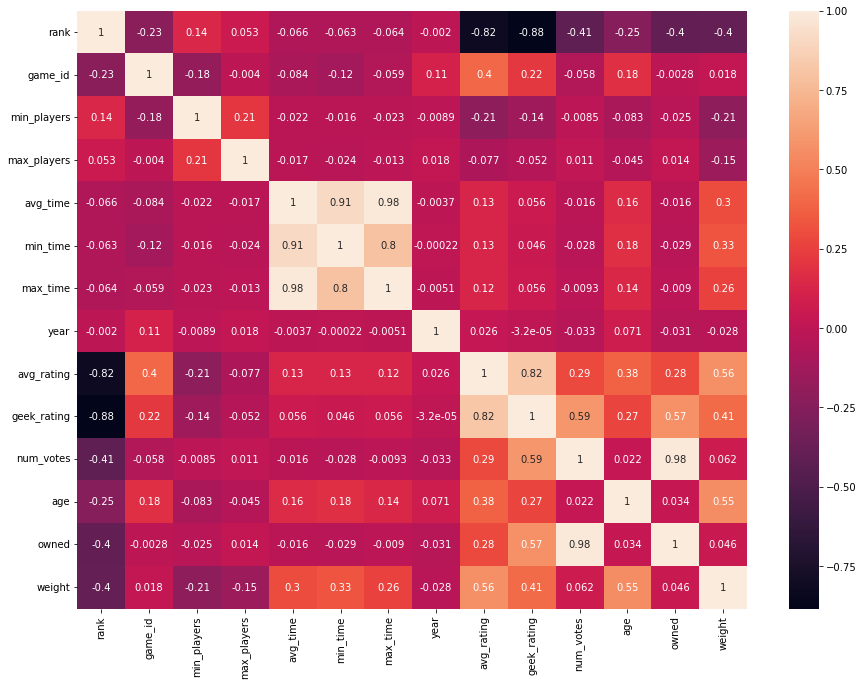

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,11)) 

# Calculamos la matriz de correlación
corr = bgg.corr()

# Representamos la matriz de correlación
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

En primer lugar observamos una fuerte correlación entre `avg_time`, `min_time` y `max_time`. Esto es de esperar dada la forma en que hemos calculado `avg_time`. También es lógica la correlación entre `min_time` y `max_time`, relación que ya hemos notado en el apartado de limpieza de los datos.

Por otro lado es notable la relación entre `geek_rating` y `avg_rating`. Dado que `geek_rating` se calcula con un algoritmo y considera `avg_rating` como uno de los _inputs_ esta correlación también es esperable.

También observamos correlación entre la complejidad (`weight`) el el tiempo de duración de la partida. Posiblemente a mayor complejidad mayor tiempo requerido para jugar al juego.

Comentar también que hay una correlación entre `weight` y `age`. De nuevo, parece lógico pensar que a mayor complejidad también la edad mínima requerida pueda ser más elevada.

A continuación analizaremos qué parámetro es más adecuado para determinar la **popularidad** de un juego. Vemos que el atributo `owned` y `num_votes` tienen una fuerte correlación. Analicemos ambas variables con detalle.

### 4.2 Popularidad de un juego
Queremos comprender qué métrica podemos usar para considerar que un juego es **popular**. Disponemos de la variable `owned`, que indica el número de usuarios que han notificado que poseen el juego.

A partir de la matriz de correlación es comprensible asumir que los juegos que tengan más votos de los usuarios (`num_votes`) puedan ser también juegos más populares. 

Por otro lado, el hecho de que un juego tenga un `avg_rating` menor o mayor no necesariamente indica que sea popular. Podemos encontrar juegos de muchísima calidad y con una puntuación elevada, pero que no sea asequible (por precio, complejidad, mecánica, etc) a la mayoría del público.

Veamos la relación entre `owned` y `num_votes`.

In [32]:
# Realizo un scatter plot de num_votes vs owned
fig_1 = px.scatter(bgg, x='owned', y='num_votes', 
                 title="Relación entre Número de votos y Usuarios que tienen el juego",
                 labels = {
                     "owned": "Usuarios que tienen el juego (owned)",
                     "num_votes": "Usuarios que han valorado el juego (num_votes)"
                 })
fig_1.show()

Exite pues una relación lineal entre ambas variables `owned` y `num_votes`. Dada la concentración de _data points_ en el extremo inferior izquierdo del gráfico, realizamos un _scatter plot_ con ejes logarítmicos.

Analizemos la **homocedasticidad** entre ambos atributos. Utilizaremos la Prueba de Levene, disponible en la librería `scipy`.

In [33]:
from scipy.stats import levene

df = bgg['owned']
norm_rating = (df - df.min()) / (df.max() - df.min())

df2 = bgg['num_votes']
norm_votes = (df2 - df2.min()) / (df2.max() - df2.min())

stat, p = levene(norm_rating, norm_votes)

print("p-value = ", round(p,5))

p-value =  0.44065


El _p-value_ es mayor que el nivel de significancia $\alpha = 0.05$, luego ambas variables son aptas para elaborar un modelo de regresión.

Añadiremos pues una recta de regresión sobre los datos, coloreando cada _data point_ según su `avg_rating`.

In [34]:
fig_2 = px.scatter(bgg, x='owned', y='num_votes', trendline='ols', log_x=True, log_y=True,
                   color='avg_rating', title="Relación entre Número de votos y Usuarios que tienen el juego",
                   labels = {
                     "owned": "Usuarios que tienen el juego (owned)",
                     "num_votes": "Usuarios que han valorado el juego (num_votes)"
                 })
fig_2.show()

# Obtenemos el factor R2 que indica la bondad de la regresión:
r_squared = px.get_trendline_results(fig_2).px_fit_results.iloc[0].rsquared
print("El valor R squared es: ", round(r_squared,3))

El valor R squared es:  0.967


La bondad del ajuste según el parámetro $R^2$ es $R^2 = 0.967$, luego la recta de regresión se ajusta muy bien a los datos de la curva `num_votes` vs `owned`.

Consideraremos entonces que `num_votes` es un indicador de la **popularidad** que tiene un juego. Podremos también comparar si es necesario con `owned`, pese a que no esperaremos obtener resultados muy diferentes.


### 4.3 Análisis de la Valoración Media `avg_rating` 
La valoración media de los usuarios tiene cierto grado de correlación con `num_votes`. También `geek_rating` tiene una correlación elevada, pero siendo esta una variable calculada y desconociendo el método de cálculo nos centramos en la valoración media dada por los usuarios.

El análisis de `num_votes` nos ayudará a acotar el espacio de diseño de nuestro juego de mesa.

Representamos en primer lugar la distribución de esta variable.

In [35]:
fig_rating = px.histogram(bgg, x="avg_rating", histnorm="probability density", title="Distribución de la variable avg_rating", 
                  labels = {
                      "avg_rating": "Valoración media de los usuarios (avg_rating)",
                  })
fig_rating.show()

Comprobemos con el test de _Shapiro-Wilk_ la normalidad de esta distribución. Hemos consultado en la documentación de `plotly` (ver [este enlace](https://plotly.com/python/v3/normality-test/)) cómo utilizar la librería `scipy` para realizar el análisis. 

In [36]:
# Importamos la librería scipy.stats
from scipy.stats import shapiro

# Realizamos el test de shapiro, guardando el resultado en las variables stat y p
stat, p = shapiro(bgg['avg_rating'])

# Interpretamos el resultado
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
    
print("p-value = ", p)
print(msg)

p-value =  1.086880596543841e-15
Sample does not look Gaussian (reject H0)


Del análisis de normalidad obtenemos que la variable `avg_rating` **no sigue una distribución normal**.

A continuación obtengamos la distribución de `avg_rating` con respecto a `num_votes`. Realizamos un hisograma así como un gráfico cumulativo.

In [37]:
fig = px.histogram(bgg, x="avg_rating", y="num_votes", marginal="box", histfunc="sum", hover_data=bgg.columns)

fig.show()

In [38]:
# Obtengo variables avg_rating y num_votes
df = bgg[['avg_rating','num_votes']]

# Ordeno por avg_rating
df = df.sort_values(by='avg_rating')

# Calculo suma cumulativa
df['votes_cumsum'] = df['num_votes'].cumsum()

px.scatter(df, x='avg_rating', y='votes_cumsum', marginal_x='box',marginal_y='box')

A partir de los gráficos anteriores centraremos nuestra atención en aquellos juegos que han obtenido un `avg_rating` mínimo de 6.5 (corresponde al percentil 25) y como máximo un `avg_rating` de 8 (valor a partir del cual apenas se incrementa la suma cumulativa de `num_votes`).

In [39]:
min_rating = 6.5
max_rating = 8.0

df_game = bgg[(bgg['avg_rating'] > min_rating) & (bgg['avg_rating'] < max_rating)]

De esta manera conseguimos acotar nuestro conjunto de datos para estudiar aquellos juegos más populares.

Si sobre estos datos representamos la distribución de `num_votes`:

In [40]:
px.scatter(df_game, x="num_votes", y="avg_rating", log_x=True, marginal_x="box", title="Distribución de num_votes")

Acotaremos finalmente nuestro juego de datos para aquellos juegos que pertenecen al percentil 25 superior. Estos corresponden a los juegos que han tenido más popularidad, tras haber estudiado la relación con `avg_rating`.

In [41]:
perc75 = df_game['num_votes'].quantile(0.75)

df_game = df_game[df_game['num_votes'] >= perc75]

### 4.x Relación entre Categorías y Juegos Comprados 
Queremos ver cúales son las temáticas o categorías que mas juegos hay en el mercado, para de este modo saber las tendencias tanto actuales como pasadas.

In [61]:
# Plot unique mechanics when splitted and plot it
cat = bgg.category.str.get_dummies(', ').stack().sum(level=1)
# sort mechanics by count and plot it
cat.sort_values(ascending=False).head(25).plot(kind='bar')

c:\Miniconda3\envs\boardgame\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



Vemos que de los top 9 categorías, 4 son juegos de mesa de guerra. Por otro lado, hay juegos de cartas, dados y estrategia. Ahora, queremos ver si estos juegos han llegado a tener muchas ventas o si son solo ha sido una moda o hay un trend que sean solo juegos de mesa sobre guerras:


Podemos ver que, por muchos juegos de la categoría 'wargame' existan en el mercado, no indica que sean de los más vendidos a excepción de los juegos de la segunda guerra mundial. No obstante, es la tercera categoría más comprada. Por otro lado, podemos ver que, estas nueve categorías han tenido al menos 100.000 ventas, por lo que puede ser un buen comienzo para saber por qué temática comenzar, llegando a ver que los tipos de cartas han llegado hasta las casi 350 mil copias vendidas. 

### 4.x Relación entre Mecánicas de Juegos y Juegos Comprados 
Queremos ver cúales son las temáticas o categorías que mas juegos hay en el mercado, para de este modo saber las tendencias tanto actuales como pasadas.

In [44]:
# Plot unique mechanics when splitted and plot it
mech = bgg.mechanic.str.get_dummies(', ').stack().sum(level=1)
# sort mechanics by count and plot it
mech.sort_values(ascending=False).head(25).plot(kind='bar')

c:\Miniconda3\envs\boardgame\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [60]:
# Merge top 9 category column values with owned column values to get the top 9 categories with the most games owned by users in the dataframe and plot it



# Zona de test

In [45]:
# MIN_PLAYERS
# Substitute 0 with min_players mean in min_players column
# bgg.min_players.replace(0,1,inplace=True) 
# NOTA: el valor min_players = 0 se trata en Valores vacios o nulos. Considero más correcto considerar min_players = max_players en este caso

# MAX_PLAYERS
# Se sustituyen los valores mayores que 10 por 10 para la variable max_players
# bgg['max_players'].where(bgg['max_players'] < 10, 10, inplace=True)
# Para los valores que son 0, se sustituyen por 1.
# bgg.max_players.replace(0,1,inplace=True)
# NOTA: ¿porqué max_players = 0 lo ponemos a 1? por otro lado, los juegos con max_players > 10 no habría que cambiarlos
# podemos encontrar juegos con max_players elevados si son juegos participativos tipo "Party&Co" o juegos de rol.


#MIN_TIME
# Sustitución de valores superiores a 90 e inferiores a 15
# bgg['min_time'].where(bgg['min_time'] < 91, 90, inplace=True)
# bgg['min_time'].where(bgg['min_time'] > 16, 15, inplace=True)
# Sustitución de valores específicos de min_time:
# bgg.min_time.replace(16,15,inplace=True)
# bgg.min_time.replace(42,40,inplace=True)
# NOTA: ¿Porqué hay que considerar que los valores superiores a 90 hay que cambiarlos? No está justificado. 


#AVG_TIME
# Sustituimos todos aquellos valores únicos cuya suma sea inferior a 5, por la media de la variable.
# mask = bgg.avg_time.map(bgg.avg_time.value_counts()) < 5
# bgg.avg_time =  bgg.avg_time.mask(mask, bgg.avg_time.mean())
# Sustituimos aquellos valores cuyo tiempo medio sea 0 por 15 min.
# bgg.avg_time.replace(0,15,inplace=True)
# NOTA: No está justificado, de hecho avg_time está mal calculado en el dataset y hay que corregirlo

#MAX_TIME
# Sustitución de valores superiores a 300 e inferiores a 10, por los valores 90 y 10 respectivamente.
# bgg['max_time'].where(bgg['max_time'] < 300, 90, inplace=True)
# bgg['max_time'].where(bgg['max_time'] > 10, 10, inplace=True)
# Sustitución de suma de valores inferior a 5 por la media de la variable.
# mask = bgg.max_time.map(bgg.max_time.value_counts()) < 5
# bgg.max_time =  bgg.max_time.mask(mask, bgg.max_time.mean())
# Sustituimos aquellos valores cuyo tiempo máximo sea 0 por 15 min.
# bgg.max_time.replace(0,15,inplace=True)
# NOTA: Esta operación tampoco está justificada, ¿porqué no podemos tener valores superiores a 300?


#YEAR
# Aquellos años inferiores a 1950, son sustituidos por el mismo.
# bgg['year'].where(bgg['year'] > 1950, 1950, inplace=True)
# NOTA: Operación no justificada, podemos tener juegos antiguos en el dataset como el ajedrez.


In [46]:

plot2 = bgg.head(1000).plot.scatter(x="avg_rating", y="weight")
plot2

In [47]:
fig_1 = px.scatter(bgg, x='geek_rating', y='avg_rating', 
                 title="Relación entre Número de votos y Usuarios que tienen el juego",
                 labels = {
                     "owned": "Usuarios que tienen el juego (owned)",
                     "num_votes": "Usuarios que han valorado el juego (num_votes)"
                 })
fig_1.show()

In [48]:
from scipy.stats import normaltest

stat, p = normaltest(bgg.avg_rating)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(bgg.avg_rating), stat, p, msg]
]

print(result_mat)

[['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'], [2717, 68.24448061932387, 1.5166987307858337e-15, 'Sample does not look Gaussian (reject H0)']]


In [49]:
plot3 = bgg.head(250).plot.scatter(x="owned", y="geek_rating")
plot3

In [50]:
#min_votes = bgg['num_votes'] > 2000
min_weight = bgg['weight'] > 1.5
min_rating = bgg['avg_rating'] > 6

df = bgg[min_weight & min_rating]
fig = px.scatter(df, x='owned', y='num_votes', trendline='ols', log_x=True, log_y=True, color='avg_rating')
#plot4 = bgg[min_votes].plot.scatter(log_x=True, log_y=True, x="owned", y="num_votes", trendline='ols')
#plot4


In [51]:
from scipy.stats import normaltest

stat, p = normaltest(bgg.weight)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(bgg.weight), stat, p, msg]
]

print(result_mat)

[['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'], [2717, 107.42422386978228, 4.711141790269297e-24, 'Sample does not look Gaussian (reject H0)']]


In [52]:
import pandas as pd

# Assuming that dataframes df1 and df2 are already defined:

print( "Dataframe 2:")
display(HTML(bgg.head().to_html()))


#bgg=pd.read_csv('../csv/bgg_db_2018_01.csv',sep=',',encoding='latin-1')


Dataframe 2:


## Referencias consultadas


Board Game Rank \[en línea\] \[fecha de consulta: 30 de mayo de 2022\]. Disponible en: https://boardgamegeek.com/browse/boardgame?sort=rank&sortdir=desc

BoardGameGeek FAQ \[en línea\] \[fecha de consulta: 31 de mayo de 2022\]. Disponible en: https://boardgamegeek.com/wiki/page/BoardGameGeek_FAQ#toc13

BoardGameWiki. Weight \[en línea\] \[fecha de consulta: 31 de mayo de 2022\]. Disponible en: https://boardgamegeek.com/wiki/page/Weight

How to delete a column in pandas \[en línea\] \[fecha de consulta: 01 de junio de 2022\]. Disponible en: https://www.educative.io/edpresso/how-to-delete-a-column-in-pandas

Pandas Plotting Backend in Python \[en línea\] \[fecha de consulta: 02 de junio de 2022\]. Disponible en: https://plotly.com/python/pandas-backend/

Working with Markdown tables in GitHub \[en línea\] \[fecha de consulta: 03 de junio de 2022\]. Disponible en: https://www.pluralsight.com/guides/working-tables-github-markdown

Practical Business Python. Overview of Pandas Data Types \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://pbpython.com/pandas_dtypes.html

Setting the Font, Title, Legend Entries, and Axis Titles in Python \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://plotly.com/python/figure-labels/

Plotly Documentation. plotly.express.histogram \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html

Plotly Documentation. Normality Tests in Python/v3 \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://plotly.com/python/v3/normality-test/

Stackoverflow. Correlation heatmap \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://stackoverflow.com/questions/39409866/correlation-heatmap

Seaborn Documentation. seaborn.heatmap \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://seaborn.pydata.org/generated/seaborn.heatmap.html

Box Plots in Python \[en línea\] \[fecha de consulta: 6 de junio de 2022\]. Disponible en: https://plotly.com/python/box-plots/

Subplots in Python \[en línea\] \[fecha de consulta: 6 de junio de 2022\]. Disponible en: https://plotly.com/python/subplots/

scipy.stats.levene \[en línea\] \[fecha de consulta: 6 de junio de 2022\]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html